In [79]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [80]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [81]:
X = iris.data[:,2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names,
     "\npredict whether:", iris.target_names)

given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']


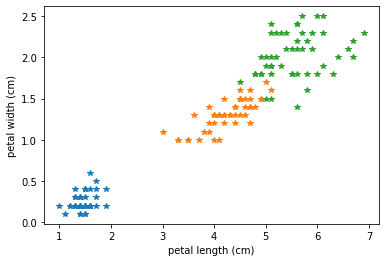

In [82]:
setonsa_indicies = []
versicolor_indicies = []
virginica_indicies = []

for i,j in enumerate(Y):
    if j == 0:
        setonsa_indicies.append(i)
    if j == 1:
        versicolor_indicies.append(i)
    if j == 2:
        virginica_indicies.append(i)


plt.figure()
plt.plot(X[setonsa_indicies,0],X[setonsa_indicies,1],"*",
         X[versicolor_indicies,0],X[versicolor_indicies,1],"*",
         X[virginica_indicies,0],X[virginica_indicies,1],"*")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()


In [83]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file = "iris_tree.dot",
                feature_names = feature_names,
                rounded = True,
                filled = True
               )

In [85]:
# ! is for shell commands
# Convert dot file to png file
!dot -Tpng iris_tree.dot -o iris_tree.png

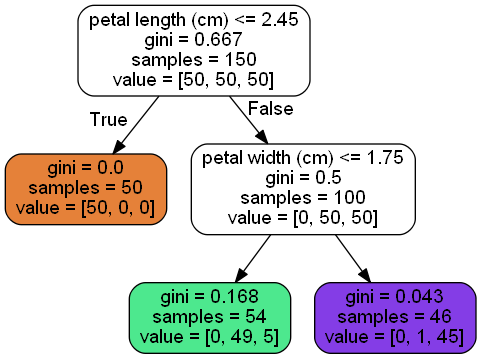

In [86]:
from IPython.display import Image
Image(filename='iris_tree.png')

In [87]:
# install the package
!pip install dtreeviz

In [88]:
from dtreeviz.trees import dtreeviz
import matplotlib as mpl

mpl.rcParams['axes.facecolor'] = 'white'
viz = dtreeviz(tree_clf,
              X,
              Y,
              target_name='flower type',
              feature_names=feature_names,
              class_names=list(iris.target_names),
              fancy=True,
              orientation='TD')

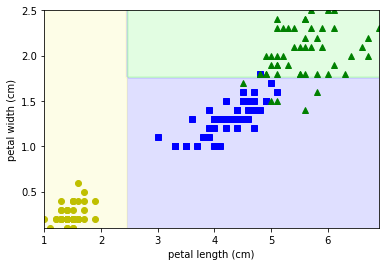

In [89]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
Custom_CMAP = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# helper function to plot the boundaries
def plot_decision_boundary(clf, x, y):
    color_map = ["yo", "bs", "g^"]
    for target_index, target_name in enumerate(iris.target_names):
        plt.plot(x[:,0][y==target_index],  
                 # petal length on X axis (the ones that equal to target)
                 x[:,1][y==target_index],
                 # petal width on Y axis (the ones that equal to target)
                 color_map[target_index],
                 label=target_name)
        
    x1s = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
    x2s = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_test = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_test).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=Custom_CMAP)
        
plot_decision_boundary(tree_clf, X, Y)
    
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

In [90]:
# check np.mgrid[minX1:maxX1:increment, minX2:maxX2:increment]
X = np.mgrid[0:10:1, -5:0:1].reshape(2,-1).T
X

array([[ 0, -5],
       [ 0, -4],
       [ 0, -3],
       [ 0, -2],
       [ 0, -1],
       [ 1, -5],
       [ 1, -4],
       [ 1, -3],
       [ 1, -2],
       [ 1, -1],
       [ 2, -5],
       [ 2, -4],
       [ 2, -3],
       [ 2, -2],
       [ 2, -1],
       [ 3, -5],
       [ 3, -4],
       [ 3, -3],
       [ 3, -2],
       [ 3, -1],
       [ 4, -5],
       [ 4, -4],
       [ 4, -3],
       [ 4, -2],
       [ 4, -1],
       [ 5, -5],
       [ 5, -4],
       [ 5, -3],
       [ 5, -2],
       [ 5, -1],
       [ 6, -5],
       [ 6, -4],
       [ 6, -3],
       [ 6, -2],
       [ 6, -1],
       [ 7, -5],
       [ 7, -4],
       [ 7, -3],
       [ 7, -2],
       [ 7, -1],
       [ 8, -5],
       [ 8, -4],
       [ 8, -3],
       [ 8, -2],
       [ 8, -1],
       [ 9, -5],
       [ 9, -4],
       [ 9, -3],
       [ 9, -2],
       [ 9, -1]])

In [91]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [92]:
tree_clf.predict([[5,1.5]])

array([1])

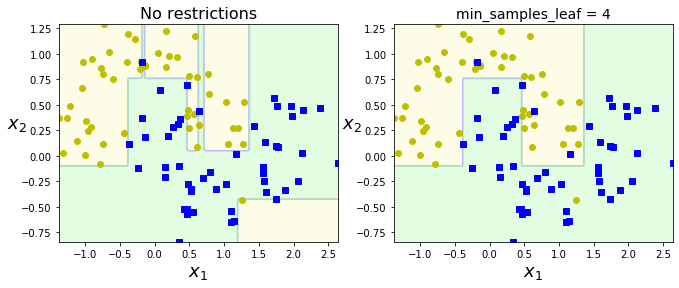

In [96]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf1, Xm, ym)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf2, Xm,ym)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

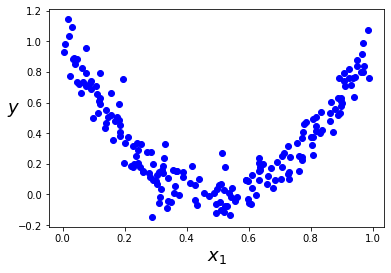

In [97]:
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) /10

plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [99]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

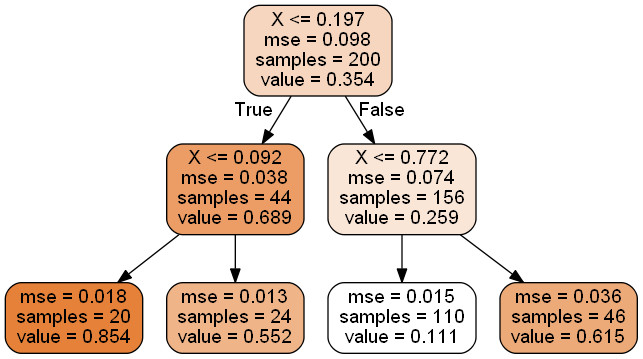

In [102]:
export_graphviz(tree_reg,
                out_file = "data_tree.dot",
                feature_names=["X"],
                class_names=["Y"],
                rounded = True,
                filled = True
               )

!dot -Tpng data_tree.dot -o data_tree.png
Image(filename='data_tree.png')

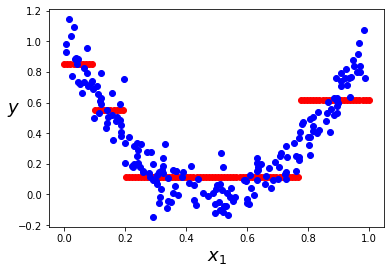

In [103]:
Xs = np.linspace(0, 1, 100).reshape(-1, 1)
Ys = tree_reg.predict(Xs)
plt.plot(Xs, Ys, "ro")
plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

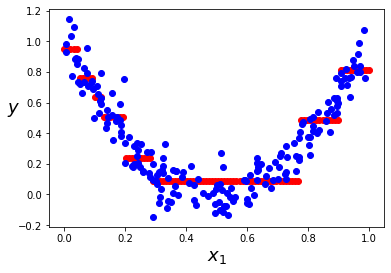

In [104]:
# max_depth=2 is at above
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X,Y)
Xs = np.linspace(0, 1, 100).reshape(-1, 1)
Ys = tree_reg.predict(Xs)
plt.plot(Xs, Ys, "ro")
plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [118]:
from sklearn.metrics import accuracy_score
def test_clfs(*clfs):
    for clf in clfs:
        clf.fit(X_train, Y_train)
        Y_Pred = clf.predict(X_test)
        print(clf.__class__.__name__+ ":", accuracy_score(Y_test, Y_Pred))


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                         ('rf', rnd_clf),
                                         ('svc', svm_clf)],
                              voting = 'hard')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)
    

LogisticRegression: 0.864
RandomForestClassifier: 0.872
SVC: 0.888
VotingClassifier: 0.896


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                         ('rf', rnd_clf),
                                         ('svc', svm_clf)],
                              voting = 'soft')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)
    

LogisticRegression: 0.864
RandomForestClassifier: 0.872
SVC: 0.888
VotingClassifier: 0.912


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

Bagging Classifier
0.904
Decision Tree Classifier
0.856


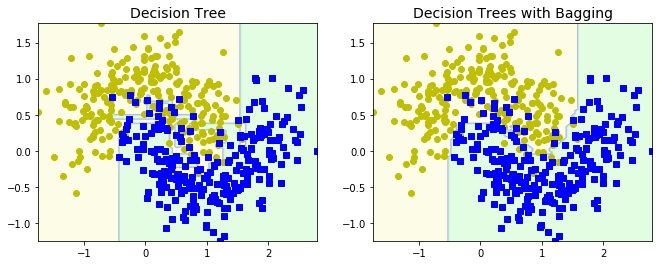

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(tree_clf,
                           n_estimators=500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1,
                           random_state=42)

bag_clf.fit(X_train, Y_train)
tree_clf.fit(X_train, Y_train)

Y_pred_bag = bag_clf.predict(X_test)
Y_pred_tree = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Bagging Classifier")
print(accuracy_score(Y_test, Y_pred_bag))
print("Decision Tree Classifier")
print(accuracy_score(Y_test, Y_pred_tree))

plt.figure(figsize=(11,4,))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [128]:
from sklearn.tree import DecisionTreeRegressor 

predictor1 = DecisionTreeRegressor(max_depth=2)
predictor2 = DecisionTreeRegressor(max_depth=2)
predictor3 = DecisionTreeRegressor(max_depth=2)

predictor1.fit(X,Y)
y_pred_1 = predictor1.predict(X)
y2 = Y - y_pred_1

predictor2.fit(X,y2)
y_pred_2 = predictor2.predict(X)
y3 = Y - y_pred_2

predictor3.fit(X,y3)
y_pred_3 = predictor3.predict(X)

end_y_pred = y_pred_1 + y_pred_2 + y_pred_3